In [135]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN_FC
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_train_thres_10.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_train_thres_10.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_valid_thres_10.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_valid_thres_10.npy')
X_test = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_test_thres_10.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_test_thres_10.npy')

"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [137]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


In [138]:
X_train_pairs = X_train_normalized.reshape(X_train_normalized.shape[0],X_train_normalized.shape[2]*X_train_normalized.shape[3])
X_valid_pairs = X_valid_normalized.reshape(X_valid_normalized.shape[0],X_valid_normalized.shape[2]*X_valid_normalized.shape[3])
X_test_pairs = X_test_normalized.reshape(X_test_normalized.shape[0],X_test_normalized.shape[2]*X_test_normalized.shape[3])

# without distance

In [139]:
dnn_normalized = LongRangeDNN_FC(num_features=20, use_deep_CNN=False)

In [140]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_pairs[:,:20], y_valid)
dnn_normalized.train(X_train_pairs[:,:20], y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 9.9970Epoch 0: validation loss: 7.695
Balanced Accuracy: 50.00%	 auROC: 0.549	 auPRC: 0.742	 auPRG: -0.047
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 11.1487 - val_loss: 7.6949
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 12.8869Epoch 1: validation loss: 1.241
Balanced Accuracy: 64.47%	 auROC: 0.735	 auPRC: 0.754	 auPRG: 0.495
Recall at 5%|10%|20% FDR: 2.9%|13.2%|53.7%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 11.0312 - val_loss: 1.2405
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 5.2447Epoch 2: validation loss: 0.854
Balanced Accuracy: 69.45%	 auROC: 0.747	 auPRC: 0.758	 auPRG: 0.515
Recall at 5%|10%|20% FDR: 2.9%|17.7%|53.4%	 Num Positives: 3

In [141]:
print(dnn_normalized.test(X_test_pairs[:, :20], y_test))

Balanced Accuracy: 70.37%	 auROC: 0.761	 auPRC: 0.767	 auPRG: 0.539
Recall at 5%|10%|20% FDR: 4.5%|10.7%|49.4%	 Num Positives: 243	 Num Negatives: 243	 


In [142]:
print(dnn_normalized.test(X_train_pairs[:, :20], y_train))

Balanced Accuracy: 93.07%	 auROC: 0.987	 auPRC: 0.988	 auPRG: 0.984
Recall at 5%|10%|20% FDR: 90.6%|96.4%|99.8%	 Num Positives: 606	 Num Negatives: 606	 


In [143]:
print(dnn_normalized.test(X_valid_pairs[:,:20], y_valid))

Balanced Accuracy: 71.06%	 auROC: 0.774	 auPRC: 0.796	 auPRG: 0.576
Recall at 5%|10%|20% FDR: 2.3%|42.8%|59.2%	 Num Positives: 311	 Num Negatives: 311	 


In [144]:
pred_probs_test = dnn_normalized.predict(X_test_pairs[:,:20])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid = dnn_normalized.predict(X_valid_pairs[:,:20])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train = dnn_normalized.predict(X_train_pairs[:,:20])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

# with genomic locations

In [145]:
dnn_normalized = LongRangeDNN_FC(num_features=22, use_deep_CNN=False)

In [146]:
validation_data = (X_valid_pairs, y_valid)
dnn_normalized.train(X_train_pairs, y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 11.4141Epoch 0: validation loss: 7.863
Balanced Accuracy: 50.00%	 auROC: 0.648	 auPRC: 0.631	 auPRG: 0.332
Recall at 5%|10%|20% FDR: 2.9%|3.5%|3.5%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 10.5742 - val_loss: 7.8628
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 10.5723Epoch 1: validation loss: 1.992
Balanced Accuracy: 60.29%	 auROC: 0.742	 auPRC: 0.751	 auPRG: 0.509
Recall at 5%|10%|20% FDR: 2.6%|19.3%|27.7%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 9.3484 - val_loss: 1.9919
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 4.1313Epoch 2: validation loss: 2.154
Balanced Accuracy: 58.04%	 auROC: 0.749	 auPRC: 0.737	 auPRG: 0.537
Recall at 5%|10%|20% FDR: 0.0%|0.0%|51.8%	 Num Positives: 311

In [147]:
print(dnn_normalized.test(X_test_pairs, y_test))

Balanced Accuracy: 69.14%	 auROC: 0.773	 auPRC: 0.784	 auPRG: 0.556
Recall at 5%|10%|20% FDR: 4.9%|32.9%|53.1%	 Num Positives: 243	 Num Negatives: 243	 


# with distance only

In [148]:
dnn_normalized = LongRangeDNN_FC(num_features=2, use_deep_CNN=True)

In [149]:
validation_data = (X_valid_pairs[:,20:], y_valid)
dnn_normalized.train(X_train_pairs[:,20:], y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 7.2665Epoch 0: validation loss: 7.234
Balanced Accuracy: 50.00%	 auROC: 0.519	 auPRC: 0.715	 auPRG: -0.020
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 8.5160 - val_loss: 7.2343
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 12.9545Epoch 1: validation loss: 5.316
Balanced Accuracy: 50.00%	 auROC: 0.571	 auPRC: 0.648	 auPRG: 0.133
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 11.5992 - val_loss: 5.3162
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 5.9019Epoch 2: validation loss: 3.166
Balanced Accuracy: 50.00%	 auROC: 0.594	 auPRC: 0.654	 auPRG: 0.139
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 N

In [150]:
print(dnn_normalized.test(X_test_pairs[:,20:], y_test))

Balanced Accuracy: 56.17%	 auROC: 0.591	 auPRC: 0.570	 auPRG: 0.164
Recall at 5%|10%|20% FDR: 0.4%|0.4%|0.4%	 Num Positives: 243	 Num Negatives: 243	 


# Print prediction

In [151]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [152]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [153]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [154]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


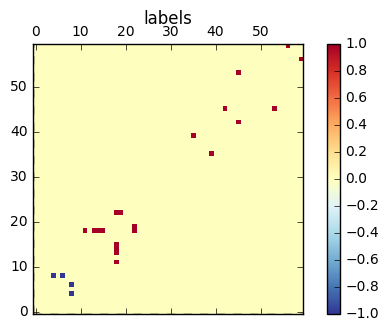

0.9934014678
(60, 60)
Limit: 0.9934014678


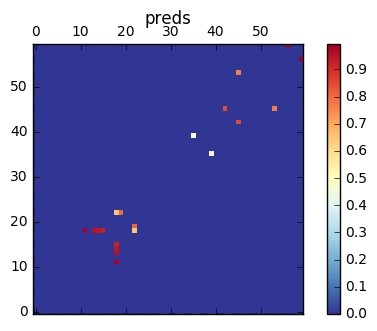

In [155]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )